# Credit Card Fraud Detecion

The dataset utilized covers credit card transactions done by European cardholders in September 2013. This dataset contains 492 frauds out of 284,807 transactions over two days. The dataset is unbalanced, with the positive class (frauds) accounting for 0.172 percent of all transactions. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import warnings
warnings.filterwarnings('ignore')
# warnings.filterwarnings(action='once')

In [2]:
dataset=pd.read_csv('creditcard.csv')

In [3]:
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


The Time is measured in seconds since the first transaction in the data collection. As a result, we may infer that this dataset contains all transactions recorded during two days. The features were prepared using PCA, so the physical interpretation of individual features does not make sense. 'Time' and 'Amount' are the only features that are not transformed to PCA. 'Class' is the response variable, and it has a value of 1 if there is fraud and 0 otherwise.

## Data Exploration and Visualization

 finding out the relative proportion of valid and fraudulent credit card transactions:

In [6]:
print("Fraudlent Cases: "+str(len(dataset[dataset['Class']==1])))
print("Valid Transactions: " +str(len(dataset[dataset["Class"] == 0])))
print("Proportion of Fraudulent Cases: " + str(len(dataset[dataset["Class"] == 1])/ dataset.shape[0]))

Fraudlent Cases: 492
Valid Transactions: 284315
Proportion of Fraudulent Cases: 0.001727485630620034


<Axes: ylabel='count'>

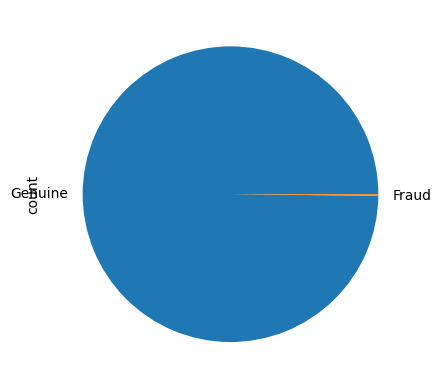

In [7]:
data_p = dataset.copy()
data_p[" "] = np.where(data_p["Class"] == 1 ,  "Fraud", "Genuine")
data_p[" "].value_counts().plot(kind="pie")

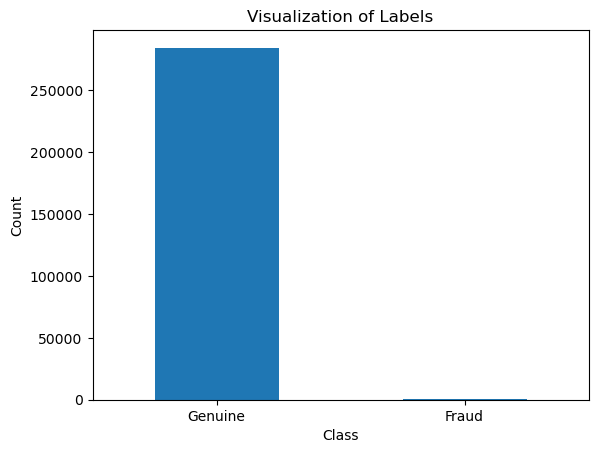

In [8]:
labels = ["Genuine", "Fraud"]
count_classes = dataset.value_counts(dataset['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

There is an imbalance in the data, with only 0.17% of the total cases being fraudulent.

Now we look at the distribution of the two named features in the dataset. For Time, it is clear that there was a particular duration in the day when most of the transactions took place:

Text(0.5, 1.0, 'Distribution of Time')

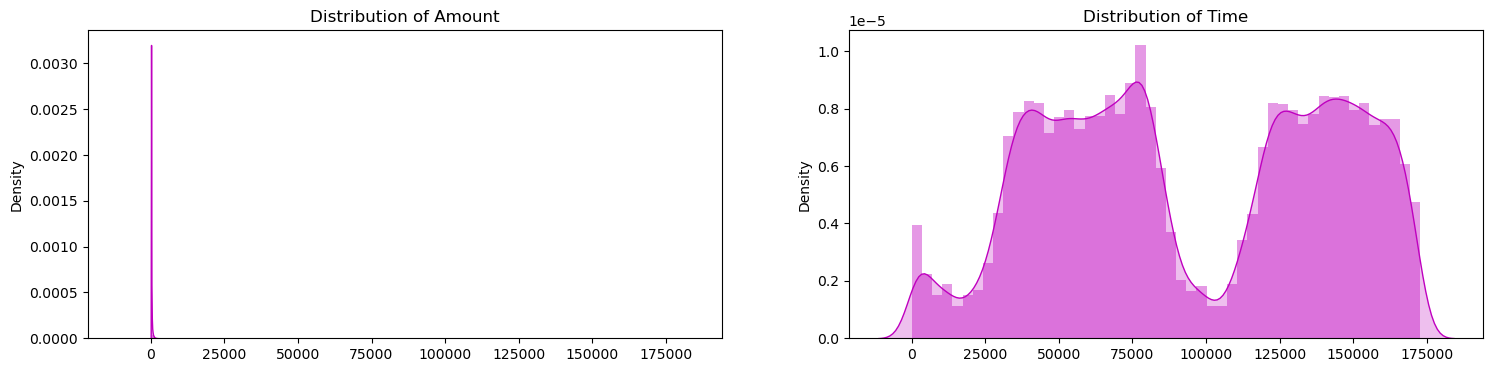

In [9]:
f, axes=plt.subplots(1,2,figsize=(18,4),sharex=True)

amount_value=dataset['Amount'].values
time_value=dataset['Time'].values

sns.distplot(amount_value, hist=True, color='m', kde_kws={"shade":True}, ax=axes[0]).set_title('Distribution of Amount')
sns.distplot(time_value, hist=True, color='m', kde_kws={"shade":True}, ax=axes[1]).set_title('Distribution of Time')

checking if there is any difference between valid transactions and fraudulent transactions:

In [10]:
print("Average Amount of Fraudlent Transactions: ", dataset[dataset["Class"]==1]["Amount"].mean())
print("Average Amount of Valid Transactions: ", dataset[dataset["Class"]==0]["Amount"].mean())

Average Amount of Fraudlent Transactions:  122.21132113821139
Average Amount of Valid Transactions:  88.29102242231328


As we notices above, that the average money transaction for the fraudulent transcations are more.

Now Let's see the distribution of values in each feature to understand the dataset more

Begining with Amount feature 

In [11]:
print("details regarding amount feature: ")
print("\n")
print(dataset['Amount'].describe())

details regarding amount feature: 


count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


Since, the most columns in our dataset doesn't provide any specific feature such as (v1 to v28), we will understanding them with some graphs. 

Also, (v1 - v28) represents the credentials/data about cardholders and are in unvalued form let's classify them by Class feature as Valid Transactions or Fraud Transcations

In [12]:
data_plot=dataset.copy()
amount=data_plot['Amount']
data_plot.drop(labels=['Amount'], axis=1, inplace=True)
data_plot.insert(0, 'Amount', amount)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


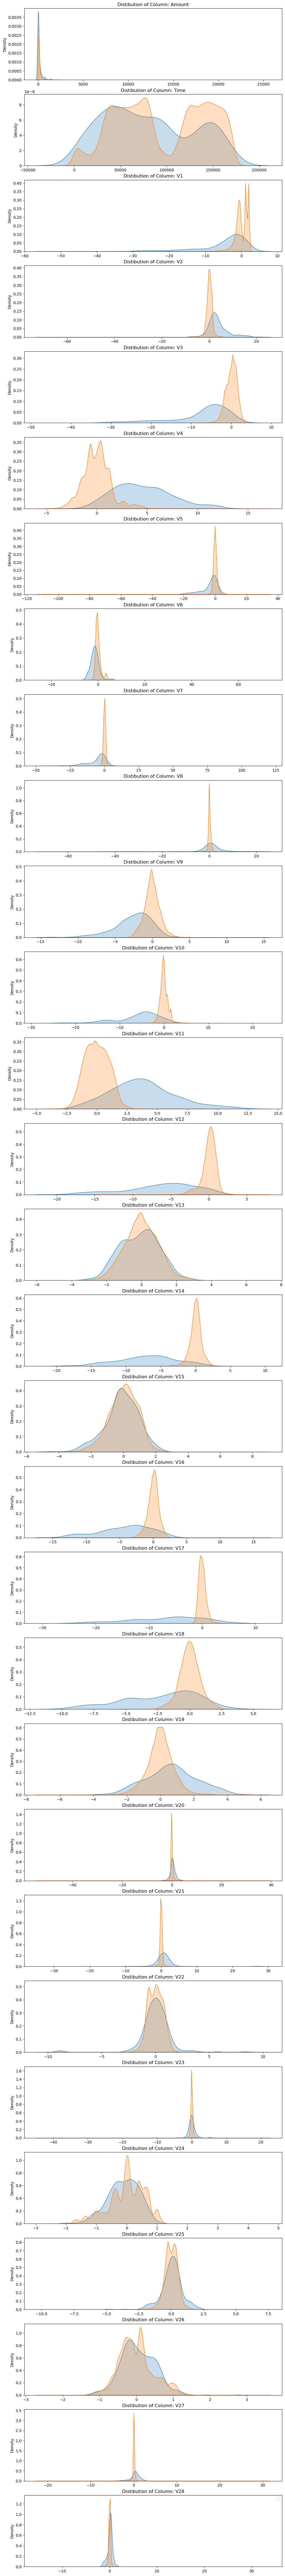

In [13]:
columns=data_plot.iloc[:, 0:30].columns
plt.figure(figsize=(12, 30*4))
grids=gridspec.GridSpec(30,1)

for grid, index in enumerate(data_plot[columns]):
    graph=plt.subplot(grids[grid])
    sns.distplot(data_plot[index][data_plot.Class == 1], hist=False, kde_kws={"shade": True}, bins=50)
    sns.distplot(data_plot[index][data_plot.Class == 0], hist=False, kde_kws={"shade": True}, bins=50)
    graph.set_xlabel("")
    graph.set_title("Distibution of Column: "+str(index))

plt.legend(loc='upper right')
plt.show()

## Data Preparation

This features are created using PCA, feature selection is unnecessary as many features are tiny. 
Now we will be searching for any missing values in the dataset:

In [14]:
print("Non-missing values: ", dataset.isnull().shape[0])
print("Missing values: ", dataset.shape[0] - dataset.isnull().shape[0])

Non-missing values:  284807
Missing values:  0


As there are no missing data, we turn to standardization. We standardize only Time and Amount using RobustScaler:

In [15]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().fit(dataset[["Time", "Amount"]])
dataset[["Time", "Amount"]] = scaler.transform(dataset[["Time", "Amount"]])

In [16]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


In [17]:
dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,1.034951,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,0
284803,1.034963,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0
284804,1.034975,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,0
284805,1.034975,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,0
284806,1.035022,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,2.724796,0


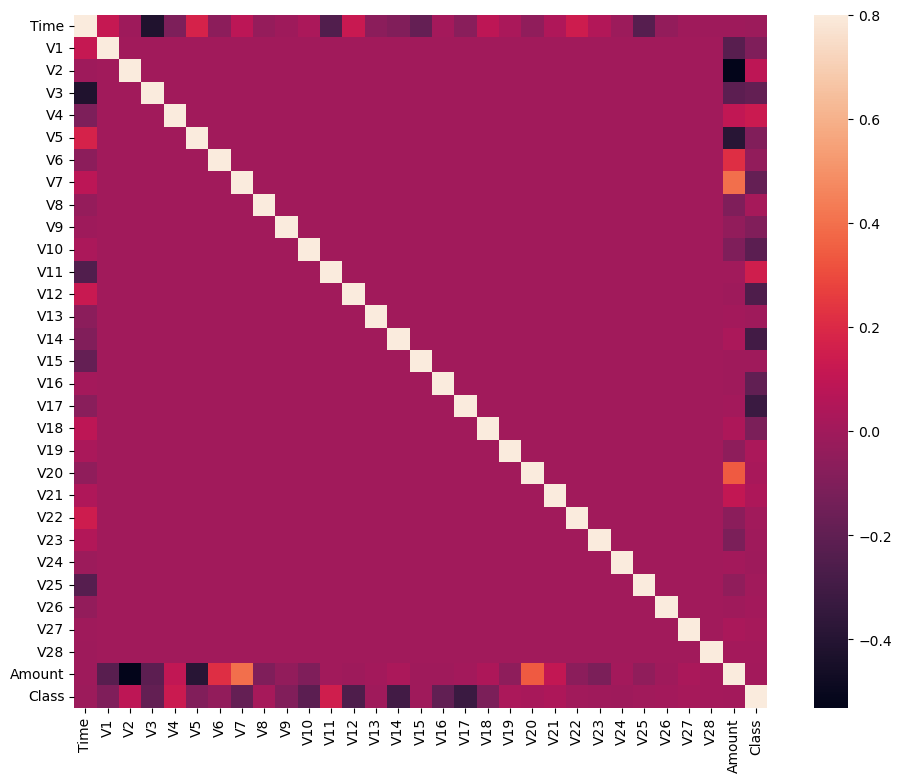

In [18]:
corrmat = dataset.corr() 
fig = plt.figure(figsize = (12, 9)) 
sns.heatmap(corrmat, vmax = .8, square = True) 
plt.show() 


Now, we will be spliting credit card data with a split of 70-30 using train_test_split(), for the models we will be using.

In [19]:
y = dataset["Class"]
X = dataset.iloc[:,:-1]

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

X_test = np.array(X_test)
y_test = np.array(y_test)

## Training the Model on Dataset

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

#Below are the Models/Classifiers we will be using on dataset
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import pickle

Function for Confusion Matrix

In [21]:
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

#### 1. Logistic Regression

In [22]:
org_lr = LogisticRegression() 
org_lr.fit(X_train, y_train) 

LogisticRegression()

In [23]:
model_pkl_file = "org_lr.pkl"  
with open(model_pkl_file, 'wb') as file:  
    pickle.dump(org_lr, file)

In [24]:
model_pkl_file = "org_lr.pkl"
with open(model_pkl_file, 'rb') as file:  
    org_lr=pickle.load(file)

y_pred_org_lr = org_lr.predict(X_test)

org_lr_acc_score=accuracy_score(y_test, y_pred_org_lr)*100
org_lr_pre_score=precision_score(y_test, y_pred_org_lr)*100
org_lr_rec_score=recall_score(y_test, y_pred_org_lr)*100
org_lr_f1_score=f1_score(y_test, y_pred_org_lr)*100

print("The accuracy is", org_lr_acc_score) 
print("The precision is", org_lr_pre_score)
print("The recall is", org_lr_rec_score)
print("The F1 score is", org_lr_f1_score)

The accuracy is 99.91222218320986
The precision is 86.36363636363636
The recall is 58.16326530612245
The F1 score is 69.51219512195121


Confusion Matrix - Logistic Regression
[[56855     9]
 [   41    57]]




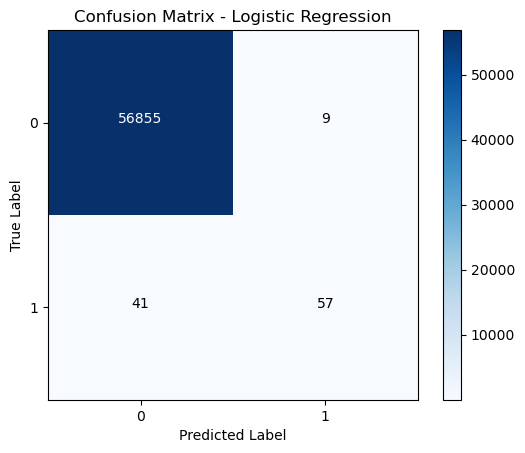

In [25]:
org_lr_cm = confusion_matrix(y_test, y_pred_org_lr.round())
print("Confusion Matrix - Logistic Regression")
print(org_lr_cm)
print("\n")
plot_confusion_matrix(org_lr_cm, classes=[0, 1], title= "Confusion Matrix - Logistic Regression")

#### 2. Random Forest Classifier

In [26]:
org_rfc = RandomForestClassifier()  

In [27]:
org_rfc.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
model_pkl_file = "org_rfc.pkl"
with open(model_pkl_file, 'wb') as file:  
    pickle.dump(org_rfc, file)

In [29]:
with open("org_rfc.pkl", 'rb') as file:  
    org_rfc=pickle.load(file)

y_pred_org_rfc = org_rfc.predict(X_test)

org_rfc_acc_score=accuracy_score(y_test, y_pred_org_rfc)*100
org_rfc_pre_score=precision_score(y_test, y_pred_org_rfc)*100
org_rfc_rec_score=recall_score(y_test, y_pred_org_rfc)*100
org_rfc_f1_score=f1_score(y_test, y_pred_org_rfc)*100

print("The accuracy is", org_rfc_acc_score) 
print("The precision is", org_rfc_pre_score)
print("The recall is", org_rfc_rec_score)
print("The F1 score is", org_rfc_f1_score)

The accuracy is 99.95962220427653
The precision is 97.46835443037975
The recall is 78.57142857142857
The F1 score is 87.00564971751412


Confusion Matrix - Random Forest Classifier
[[56862     2]
 [   21    77]]




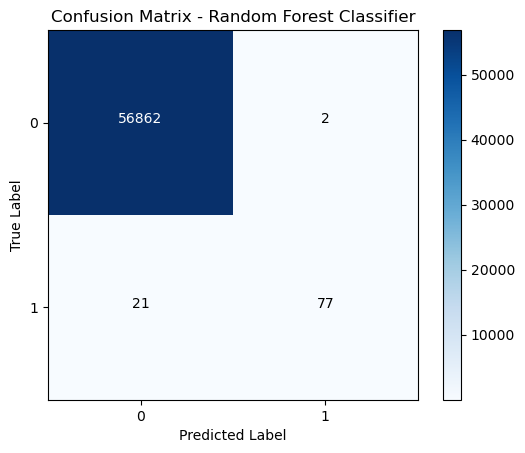

In [30]:
org_rfc_cm = confusion_matrix(y_test, y_pred_org_rfc.round())
print("Confusion Matrix - Random Forest Classifier")
print(org_rfc_cm)
print("\n")
plot_confusion_matrix(org_rfc_cm, classes=[0, 1], title= "Confusion Matrix - Random Forest Classifier")

#### 3. Decision Tree Classifier

In [31]:
org_dtc = DecisionTreeClassifier() 
org_dtc.fit(X_train, y_train) 

DecisionTreeClassifier()

In [32]:
with open("org_dtc.pkl", 'wb') as file:  
    pickle.dump(org_dtc, file)

In [33]:
with open("org_dtc.pkl", 'rb') as file:  
    org_dtc=pickle.load(file)

y_pred_org_dtc = org_dtc.predict(X_test)

org_dtc_acc_score=accuracy_score(y_test, y_pred_org_dtc)*100
org_dtc_pre_score=precision_score(y_test, y_pred_org_dtc)*100
org_dtc_rec_score=recall_score(y_test, y_pred_org_dtc)*100
org_dtc_f1_score=f1_score(y_test, y_pred_org_dtc)*100

print("The accuracy is", org_dtc_acc_score) 
print("The precision is", org_dtc_pre_score)
print("The recall is", org_dtc_rec_score)
print("The F1 score is", org_dtc_f1_score)

The accuracy is 99.91046662687407
The precision is 71.96261682242991
The recall is 78.57142857142857
The F1 score is 75.1219512195122


Confusion Matrix - Decision Tree Classifier
[[56834    30]
 [   21    77]]




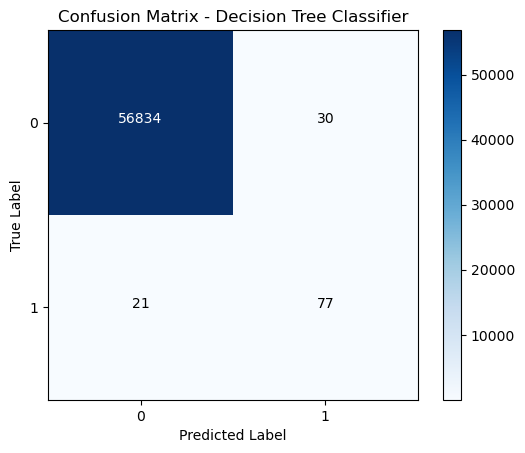

In [34]:
org_dtc_cm = confusion_matrix(y_test, y_pred_org_dtc.round())
print("Confusion Matrix - Decision Tree Classifier")
print(org_dtc_cm)
print("\n")
plot_confusion_matrix(org_dtc_cm, classes=[0, 1], title= "Confusion Matrix - Decision Tree Classifier")

#### 4. K Neighbors Classifier

In [35]:
org_knc=KNeighborsClassifier() 
org_knc.fit(X_train, y_train) 

KNeighborsClassifier()

In [36]:
with open("org_knc.pkl", 'wb') as file:  
    pickle.dump(org_knc, file)

In [37]:
with open("org_knc.pkl", 'rb') as file:  
    org_knc=pickle.load(file)

y_pred_org_knc = org_knc.predict(X_test)

org_knc_acc_score=accuracy_score(y_test, y_pred_org_knc)*100
org_knc_pre_score=precision_score(y_test, y_pred_org_knc)*100
org_knc_rec_score=recall_score(y_test, y_pred_org_knc)*100
org_knc_f1_score=f1_score(y_test, y_pred_org_knc)*100

print("The accuracy is", org_knc_acc_score) 
print("The precision is", org_knc_pre_score)
print("The recall is", org_knc_rec_score)
print("The F1 score is", org_knc_f1_score)

The accuracy is 99.94908886626172
The precision is 94.8051948051948
The recall is 74.48979591836735
The F1 score is 83.42857142857143


Confusion Matrix - K Neighbors Classifiers
[[56860     4]
 [   25    73]]




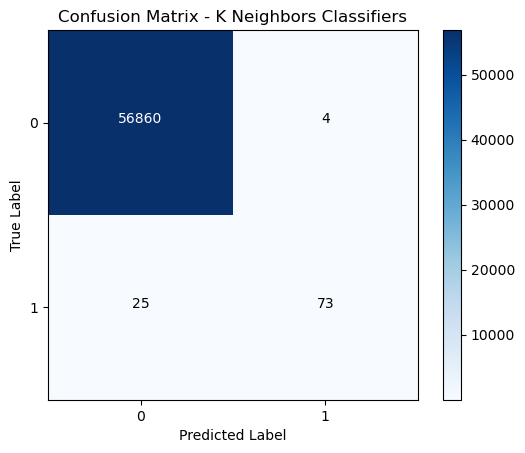

In [38]:
org_knc_cm = confusion_matrix(y_test, y_pred_org_knc.round())
print("Confusion Matrix - K Neighbors Classifiers")
print(org_knc_cm)
print("\n")
plot_confusion_matrix(org_knc_cm, classes=[0, 1], title= "Confusion Matrix - K Neighbors Classifiers")

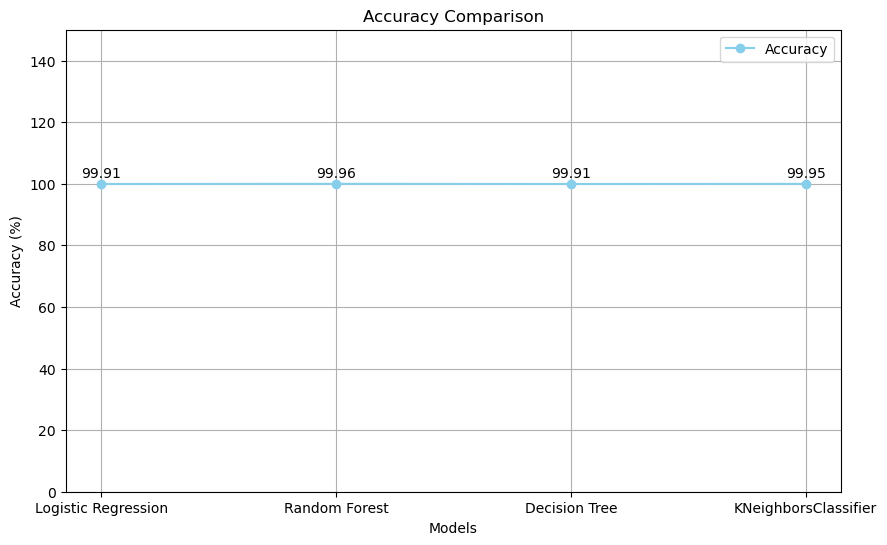

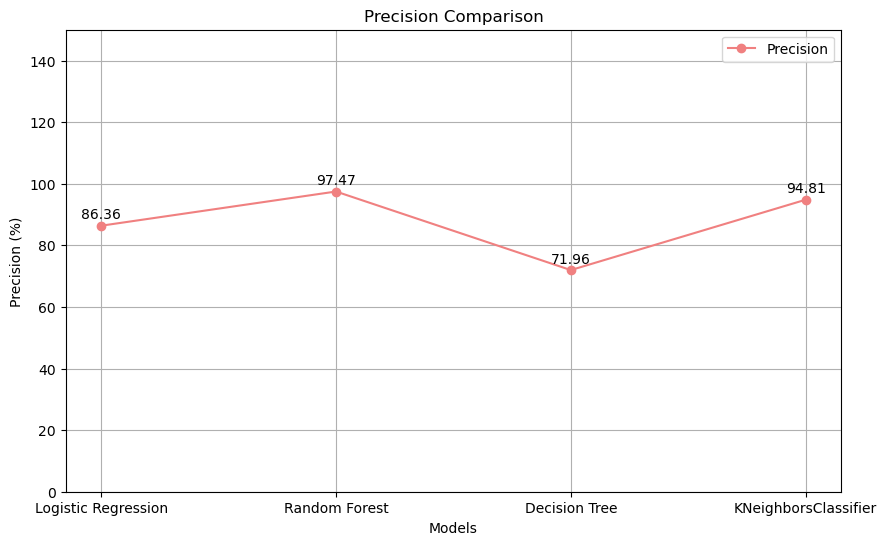

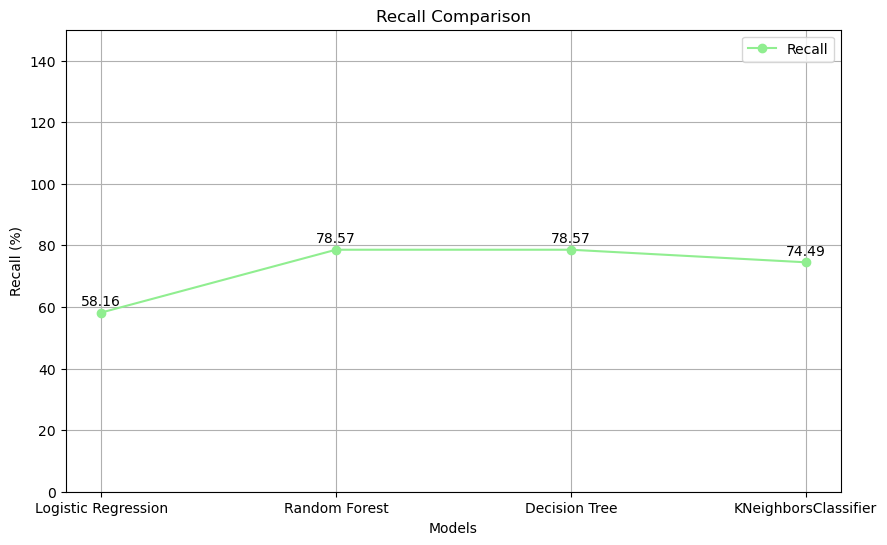

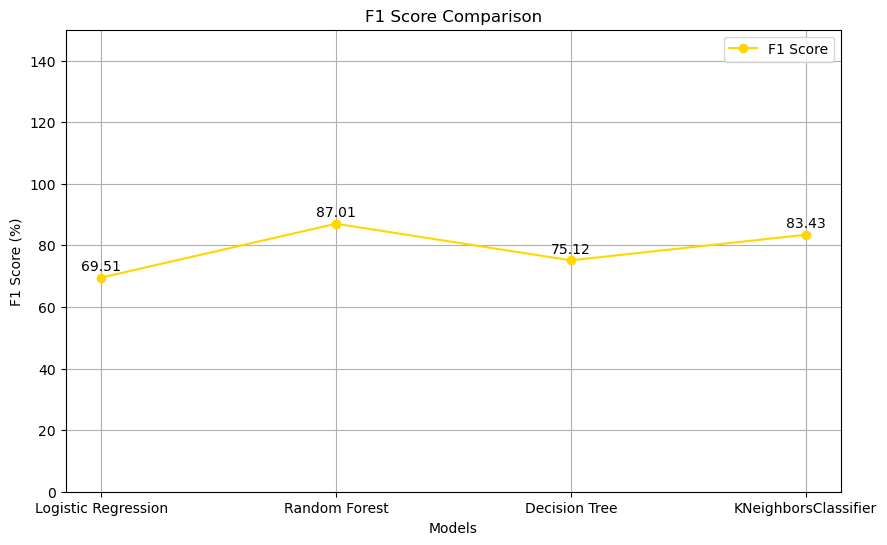

In [39]:

org_models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'KNeighborsClassifier']
org_acc_scores = [org_lr_acc_score, org_rfc_acc_score, org_dtc_acc_score, org_knc_acc_score]
org_pre_scores = [org_lr_pre_score, org_rfc_pre_score, org_dtc_pre_score, org_knc_pre_score]
org_rec_scores = [org_lr_rec_score, org_rfc_rec_score, org_dtc_rec_score, org_knc_rec_score]
org_f1_scores = [org_lr_f1_score, org_rfc_f1_score, org_dtc_f1_score, org_knc_f1_score]

def add_labels(ax, values):
    for i, txt in enumerate(values):
        ax.annotate(f'{txt:.2f}', (i, txt), textcoords="offset points", xytext=(0,5), ha='center')

# Plotting Accuracy
plt.figure(figsize=(10, 6))
plt.plot(org_models, org_acc_scores, marker='o', label='Accuracy', color='skyblue')
add_labels(plt.gca(), org_acc_scores)
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison')
plt.ylim(0, 150)
plt.legend()
plt.grid(True)
plt.show()

# Plotting Precision
plt.figure(figsize=(10, 6))
plt.plot(org_models, org_pre_scores, marker='o', label='Precision', color='lightcoral')
add_labels(plt.gca(), org_pre_scores)
plt.xlabel('Models')
plt.ylabel('Precision (%)')
plt.title('Precision Comparison')
plt.ylim(0, 150)
plt.legend()
plt.grid(True)
plt.show()

# Plotting Recall
plt.figure(figsize=(10, 6))
plt.plot(org_models, org_rec_scores, marker='o', label='Recall', color='lightgreen')
add_labels(plt.gca(), org_rec_scores)
plt.xlabel('Models')
plt.ylabel('Recall (%)')
plt.title('Recall Comparison')
plt.ylim(0, 150)
plt.legend()
plt.grid(True)
plt.show()

# Plotting F1 Score
plt.figure(figsize=(10, 6))
plt.plot(org_models, org_f1_scores, marker='o', label='F1 Score', color='gold')
add_labels(plt.gca(), org_f1_scores)
plt.xlabel('Models')
plt.ylabel('F1 Score (%)')
plt.title('F1 Score Comparison')
plt.ylim(0, 150)
plt.legend()
plt.grid(True)
plt.show()

## Undersampling

In this section, we will perform undersampling to our dataset. One trivial point to note is that we will not undersample the testing data as we want our model to perform well with skewed cprlass distributions.

The steps are as follows:

Use a 5-fold cross-validation on the training set.
On each of the folds, use undersampling.
Fit the model on the training folds and validate on the validation fold.

#### NearMiss Methods


Near Miss refers to a group of undersampling strategies that pick samples based on the distance between majority and minority class instances.

In the below code, we're making a flexible function that can perform grid or randomized search on a given estimator and its parameters with or without under/oversampling and returns the best estimator along with the performance metrics:

In [40]:
from imblearn.under_sampling import NearMiss

X_resampled, y_resampled = NearMiss().fit_resample(X_train, y_train)
print("Resampled shape of X: ", X_resampled.shape)
print("Resampled shape of Y: ", y_resampled.shape)
# value_counts = Counter(Y_resampled)
# print(value_counts)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 42)

Resampled shape of X:  (788, 30)
Resampled shape of Y:  (788,)


#### 1. Logistic Regression

In [41]:
un_lr=LogisticRegression()
un_lr.fit(X_resampled, y_resampled)

LogisticRegression()

In [42]:
with open("un_lr.pkl", 'wb') as file:  
    pickle.dump(un_lr, file)

In [43]:
with open("un_lr.pkl", 'rb') as file:  
    un_lr=pickle.load(file)
    
y_pred_un_lr = un_lr.predict(X_test)

un_lr_acc_score=accuracy_score(y_test, y_pred_un_lr)*100
un_lr_pre_score=precision_score(y_test, y_pred_un_lr)*100
un_lr_rec_score=recall_score(y_test, y_pred_un_lr)*100
un_lr_f1_score=f1_score(y_test, y_pred_un_lr)*100

print("The accuracy is", un_lr_acc_score) 
print("The precision is", un_lr_pre_score)
print("The recall is", un_lr_rec_score)
print("The F1 score is", un_lr_f1_score)

The accuracy is 96.20253164556962
The precision is 97.53086419753086
The recall is 95.18072289156626
The F1 score is 96.34146341463415


Confusion Matrix - Logistic Regression
[[73  2]
 [ 4 79]]




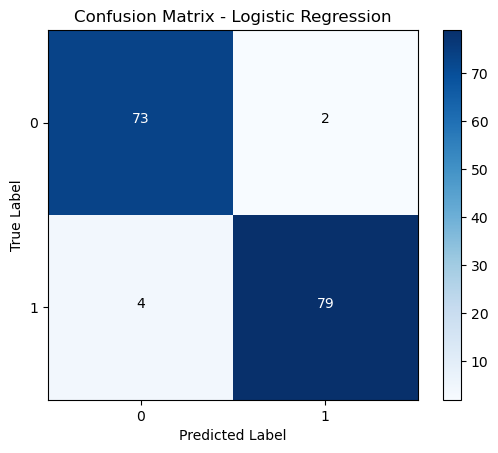

In [44]:
un_lr_cm = confusion_matrix(y_test, y_pred_un_lr.round())
print("Confusion Matrix - Logistic Regression")
print(un_lr_cm)
print("\n")
plot_confusion_matrix(un_lr_cm, classes=[0, 1], title= "Confusion Matrix - Logistic Regression")

#### 2. Random Forest Classifier

In [45]:
un_rfc=RandomForestClassifier()
un_rfc.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [46]:
with open("un_rfc.pkl", 'wb') as file:  
    pickle.dump(un_rfc, file)

In [47]:
with open("un_rfc.pkl", 'rb') as file:  
    un_rfc=pickle.load(file)

The accuracy is 100.0
The precision is 100.0
The recall is 100.0
The F1 score is 100.0
Confusion Matrix - Random Forest Classifier
[[75  0]
 [ 0 83]]




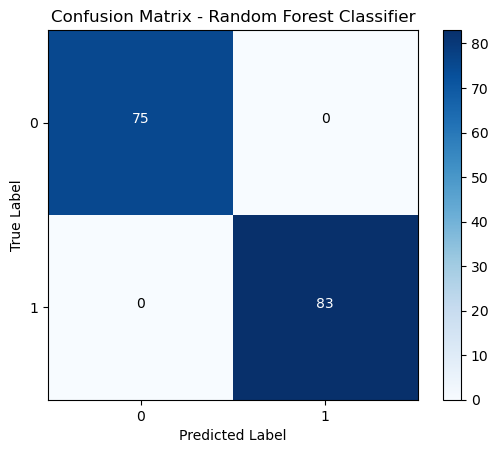

In [48]:
y_pred_un_rfc = un_rfc.predict(X_test)

un_rfc_acc_score=accuracy_score(y_test, y_pred_un_rfc)*100
un_rfc_pre_score=precision_score(y_test, y_pred_un_rfc)*100
un_rfc_rec_score=recall_score(y_test, y_pred_un_rfc)*100
un_rfc_f1_score=f1_score(y_test, y_pred_un_rfc)*100

print("The accuracy is", un_rfc_acc_score) 
print("The precision is", un_rfc_pre_score)
print("The recall is", un_rfc_rec_score)
print("The F1 score is", un_rfc_f1_score)

un_rfc_cm = confusion_matrix(y_test, y_pred_un_rfc.round())
print("Confusion Matrix - Random Forest Classifier")
print(un_rfc_cm)
print("\n")
plot_confusion_matrix(un_rfc_cm, classes=[0, 1], title= "Confusion Matrix - Random Forest Classifier")

#### 3. Decision Tree Classifier

In [49]:
un_dtc=DecisionTreeClassifier()
un_dtc.fit(X_resampled, y_resampled)

DecisionTreeClassifier()

In [50]:
with open("un_dtc.pkl", 'wb') as file:  
    pickle.dump(un_dtc, file)

In [51]:
with open("un_dtc.pkl", 'rb') as file:  
    un_dtc=pickle.load(file)

The accuracy is 100.0
The precision is 100.0
The recall is 100.0
The F1 score is 100.0
Confusion Matrix - Decision Tree Classifier
[[75  0]
 [ 0 83]]




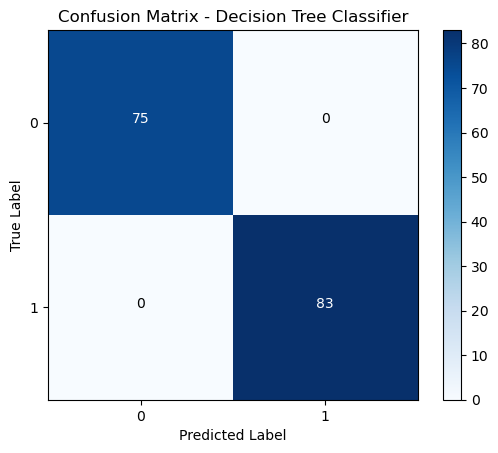

In [52]:
y_pred_un_dtc = un_dtc.predict(X_test)

un_dtc_acc_score=accuracy_score(y_test, y_pred_un_dtc)*100
un_dtc_pre_score=precision_score(y_test, y_pred_un_dtc)*100
un_dtc_rec_score=recall_score(y_test, y_pred_un_dtc)*100
un_dtc_f1_score=f1_score(y_test, y_pred_un_dtc)*100

print("The accuracy is", un_dtc_acc_score) 
print("The precision is", un_dtc_pre_score)
print("The recall is", un_dtc_rec_score)
print("The F1 score is", un_dtc_f1_score)

un_dtc_cm = confusion_matrix(y_test, y_pred_un_dtc.round())
print("Confusion Matrix - Decision Tree Classifier")
print(un_dtc_cm)
print("\n")
plot_confusion_matrix(un_dtc_cm, classes=[0, 1], title= "Confusion Matrix - Decision Tree Classifier")

#### 4. K Neighbors Classifier

In [53]:
un_knc=KNeighborsClassifier()
un_knc.fit(X_resampled, y_resampled)

KNeighborsClassifier()

In [54]:
with open("un_knc.pkl", 'wb') as file:  
    pickle.dump(un_knc, file)

In [55]:
with open("un_knc.pkl", 'rb') as file:  
    un_knc=pickle.load(file)

The accuracy is 95.56962025316456
The precision is 98.71794871794873
The recall is 92.7710843373494
The F1 score is 95.65217391304347
Confusion Matrix - K Neighbors Classifiers
[[74  1]
 [ 6 77]]




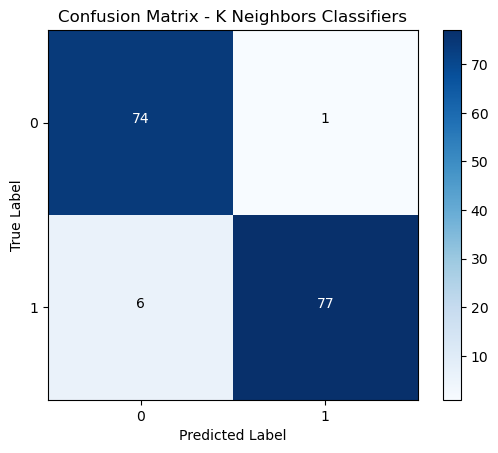

In [56]:
y_pred_un_knc = un_knc.predict(X_test)

un_knc_acc_score=accuracy_score(y_test, y_pred_un_knc)*100
un_knc_pre_score=precision_score(y_test, y_pred_un_knc)*100
un_knc_rec_score=recall_score(y_test, y_pred_un_knc)*100
un_knc_f1_score=f1_score(y_test, y_pred_un_knc)*100

print("The accuracy is", un_knc_acc_score) 
print("The precision is", un_knc_pre_score)
print("The recall is", un_knc_rec_score)
print("The F1 score is", un_knc_f1_score)

un_knc_cm = confusion_matrix(y_test, y_pred_un_knc.round())
print("Confusion Matrix - K Neighbors Classifiers")
print(un_knc_cm)
print("\n")
plot_confusion_matrix(un_knc_cm, classes=[0, 1], title= "Confusion Matrix - K Neighbors Classifiers")

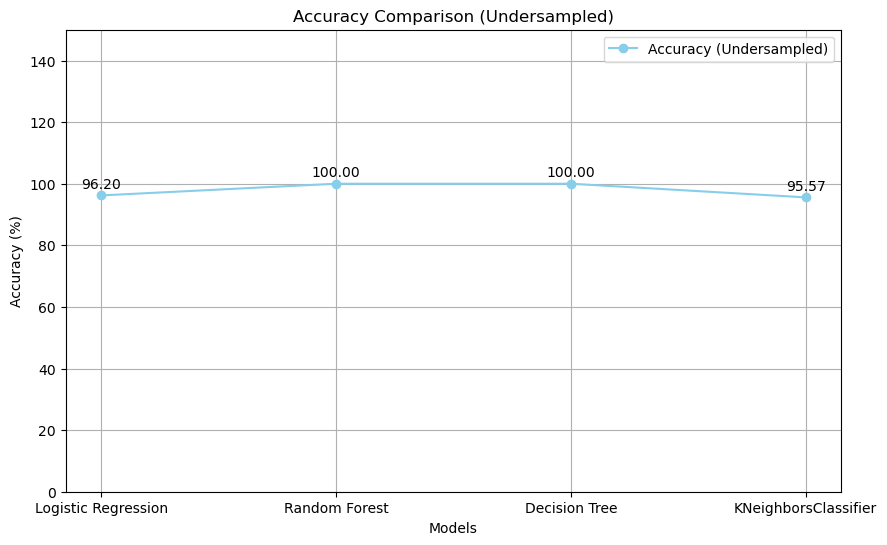

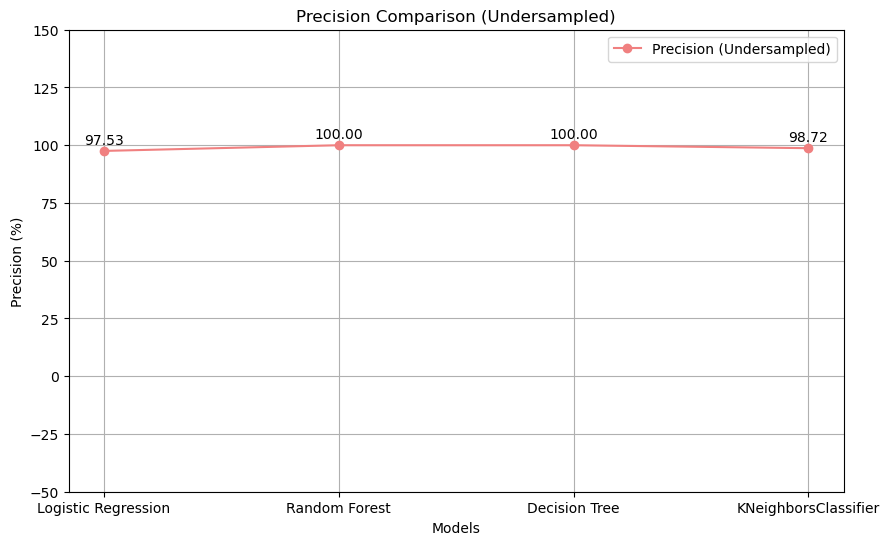

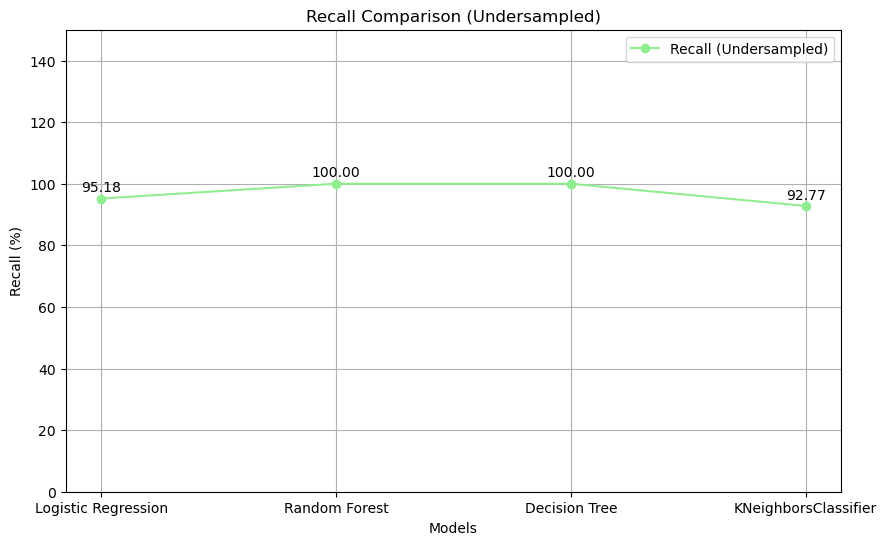

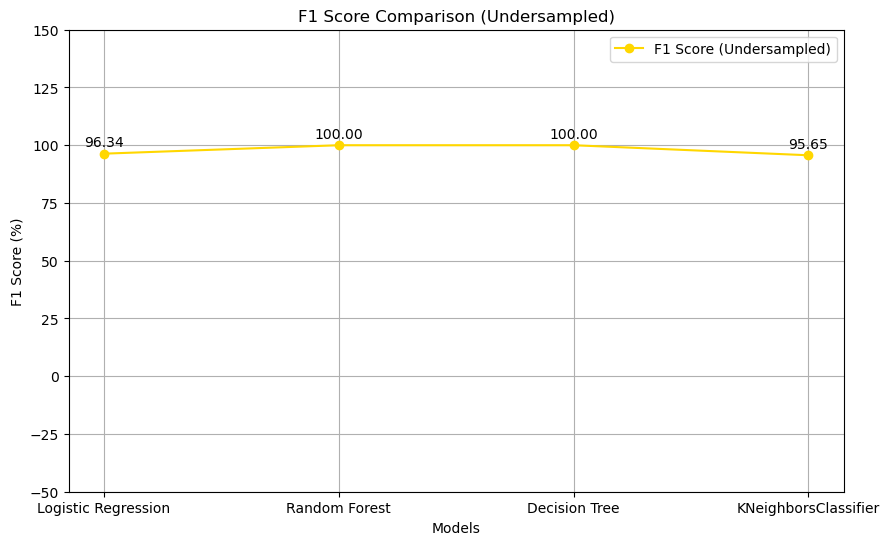

In [57]:
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'KNeighborsClassifier']
acc_scores_undersampling = [un_lr_acc_score, un_rfc_acc_score, un_dtc_acc_score, un_knc_acc_score]
pre_scores_undersampling = [un_lr_pre_score, un_rfc_pre_score, un_dtc_pre_score, un_knc_pre_score]
rec_scores_undersampling = [un_lr_rec_score, un_rfc_rec_score, un_dtc_rec_score, un_knc_rec_score]
f1_scores_undersampling = [un_lr_f1_score, un_rfc_f1_score, un_dtc_f1_score, un_knc_f1_score]

def add_labels(ax, values):
    for i, txt in enumerate(values):
        ax.annotate(f'{txt:.2f}', (i, txt), textcoords="offset points", xytext=(0,5), ha='center')

plt.figure(figsize=(10, 6))
plt.plot(models, acc_scores_undersampling, marker='o', label='Accuracy (Undersampled)', color='skyblue')
add_labels(plt.gca(), acc_scores_undersampling)
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison (Undersampled)')
plt.ylim(0, 150)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(models, pre_scores_undersampling, marker='o', label='Precision (Undersampled)', color='lightcoral')
add_labels(plt.gca(), pre_scores_undersampling)
plt.xlabel('Models')
plt.ylabel('Precision (%)')
plt.title('Precision Comparison (Undersampled)')
plt.ylim(-50, 150)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(models, rec_scores_undersampling, marker='o', label='Recall (Undersampled)', color='lightgreen')
add_labels(plt.gca(), rec_scores_undersampling)
plt.xlabel('Models')
plt.ylabel('Recall (%)')
plt.title('Recall Comparison (Undersampled)')
plt.ylim(0, 150)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(models, f1_scores_undersampling, marker='o', label='F1 Score (Undersampled)', color='gold')
add_labels(plt.gca(), f1_scores_undersampling)
plt.xlabel('Models')
plt.ylabel('F1 Score (%)')
plt.title('F1 Score Comparison (Undersampled)')
plt.ylim(-50, 150)
plt.legend()
plt.grid(True)
plt.show()


### OverSampling

In [58]:
from imblearn.over_sampling import SMOTE
X_oversampled, y_oversampled = SMOTE().fit_resample(X_train, y_train)
print("Resampled shape of X: ", X_oversampled.shape)
print("Resampled shape of Y: ", y_oversampled.shape)
# value_counts = Counter(Y_resampled)
# print(value_counts)
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size = 0.2, random_state = 42)

Resampled shape of X:  (638, 30)
Resampled shape of Y:  (638,)


#### 1. Logistic Regression

In [59]:
ov_lr=LogisticRegression()
ov_lr.fit(X_oversampled, y_oversampled)

LogisticRegression()

In [60]:
with open("ov_lr.pkl", 'wb') as file:  
    pickle.dump(ov_lr, file)

In [61]:
with open("ov_lr.pkl", 'rb') as file:  
    ov_lr=pickle.load(file)
    
y_pred_ov_lr = ov_lr.predict(X_test)

ov_lr_acc_score=accuracy_score(y_test, y_pred_ov_lr)*100
ov_lr_pre_score=precision_score(y_test, y_pred_ov_lr)*100
ov_lr_rec_score=recall_score(y_test, y_pred_ov_lr)*100
ov_lr_f1_score=f1_score(y_test, y_pred_ov_lr)*100

print("The accuracy is", ov_lr_acc_score) 
print("The precision is", ov_lr_pre_score)
print("The recall is", ov_lr_rec_score)
print("The F1 score is", ov_lr_f1_score)

The accuracy is 94.53125
The precision is 100.0
The recall is 89.55223880597015
The F1 score is 94.48818897637796


Confusion Matrix - Logistic Regression
[[61  0]
 [ 7 60]]




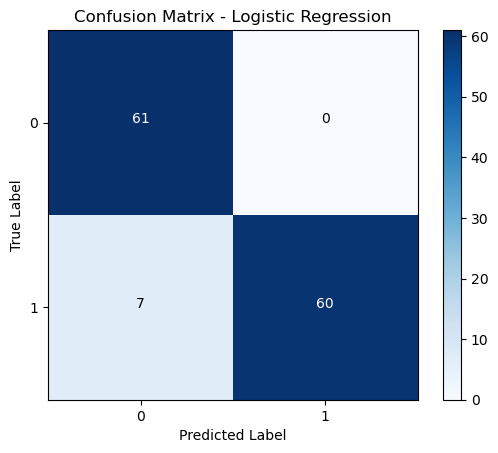

In [62]:
ov_lr_cm = confusion_matrix(y_test, y_pred_ov_lr.round())
print("Confusion Matrix - Logistic Regression")
print(ov_lr_cm)
print("\n")
plot_confusion_matrix(ov_lr_cm, classes=[0, 1], title= "Confusion Matrix - Logistic Regression")

#### 2. Random Forest Classifier

In [63]:
ov_rfc=RandomForestClassifier()
ov_rfc.fit(X_oversampled, y_oversampled)

RandomForestClassifier()

In [64]:
with open("ov_rfc.pkl", 'wb') as file:  
    pickle.dump(ov_rfc, file)

In [65]:
with open("ov_rfc.pkl", 'rb') as file:  
    ov_rfc=pickle.load(file)
    
y_pred_ov_rfc = ov_rfc.predict(X_test)

ov_rfc_acc_score=accuracy_score(y_test, y_pred_ov_rfc)*100
ov_rfc_pre_score=precision_score(y_test, y_pred_ov_rfc)*100
ov_rfc_rec_score=recall_score(y_test, y_pred_ov_rfc)*100
ov_rfc_f1_score=f1_score(y_test, y_pred_ov_rfc)*100

print("The accuracy is", ov_rfc_acc_score) 
print("The precision is", ov_rfc_pre_score)
print("The recall is", ov_rfc_rec_score)
print("The F1 score is", ov_rfc_f1_score)

The accuracy is 100.0
The precision is 100.0
The recall is 100.0
The F1 score is 100.0


Confusion Matrix - Random Forest Classifier
[[61  0]
 [ 0 67]]




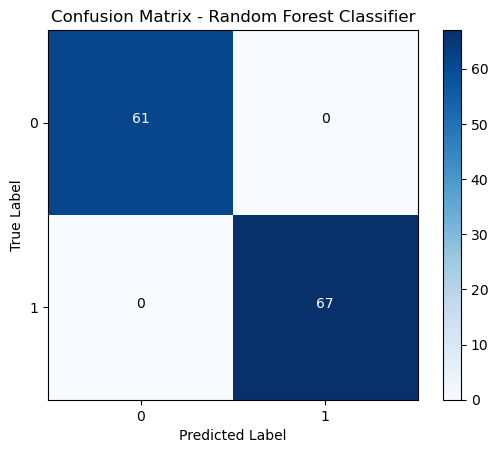

In [66]:
ov_rfc_cm = confusion_matrix(y_test, y_pred_ov_rfc.round())
print("Confusion Matrix - Random Forest Classifier")
print(ov_rfc_cm)
print("\n")
plot_confusion_matrix(ov_rfc_cm, classes=[0, 1], title= "Confusion Matrix - Random Forest Classifier")

#### 3. Decision Tree Classifier

In [67]:
ov_dtc=DecisionTreeClassifier()
ov_dtc.fit(X_oversampled, y_oversampled)

DecisionTreeClassifier()

In [68]:
with open("ov_dtc.pkl", 'wb') as file:  
    pickle.dump(ov_dtc, file)

In [69]:
with open("ov_dtc.pkl", 'rb') as file:  
    ov_dtc=pickle.load(file)
    
y_pred_ov_dtc = ov_dtc.predict(X_test)

ov_dtc_acc_score=accuracy_score(y_test, y_pred_ov_dtc)*100
ov_dtc_pre_score=precision_score(y_test, y_pred_ov_dtc)*100
ov_dtc_rec_score=recall_score(y_test, y_pred_ov_dtc)*100
ov_dtc_f1_score=f1_score(y_test, y_pred_ov_dtc)*100

print("The accuracy is", ov_dtc_acc_score) 
print("The precision is", ov_dtc_pre_score)
print("The recall is", ov_dtc_rec_score)
print("The F1 score is", ov_dtc_f1_score)

The accuracy is 100.0
The precision is 100.0
The recall is 100.0
The F1 score is 100.0


Confusion Matrix - Decision Tree Classifier
[[61  0]
 [ 0 67]]




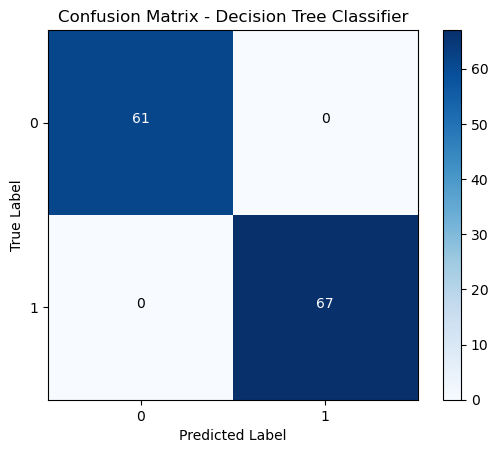

In [70]:
ov_dtc_cm = confusion_matrix(y_test, y_pred_ov_dtc.round())
print("Confusion Matrix - Decision Tree Classifier")
print(ov_dtc_cm)
print("\n")
plot_confusion_matrix(ov_dtc_cm, classes=[0, 1], title= "Confusion Matrix - Decision Tree Classifier")

#### 4. K Neighbors Classifiers

In [71]:
ov_knc=KNeighborsClassifier()
ov_knc.fit(X_oversampled, y_oversampled)

KNeighborsClassifier()

In [72]:
with open("ov_knc.pkl", 'wb') as file:  
    pickle.dump(ov_knc, file)

In [73]:
with open("ov_knc.pkl", 'rb') as file:  
    ov_knc=pickle.load(file)
    
y_pred_ov_knc = ov_knc.predict(X_test)

ov_knc_acc_score=accuracy_score(y_test, y_pred_ov_knc)*100
ov_knc_pre_score=precision_score(y_test, y_pred_ov_knc)*100
ov_knc_rec_score=recall_score(y_test, y_pred_ov_knc)*100
ov_knc_f1_score=f1_score(y_test, y_pred_ov_knc)*100

print("The accuracy is", ov_knc_acc_score) 
print("The precision is", ov_knc_pre_score)
print("The recall is", ov_knc_rec_score)
print("The F1 score is", ov_knc_f1_score)

The accuracy is 92.1875
The precision is 100.0
The recall is 85.07462686567165
The F1 score is 91.93548387096774


Confusion Matrix - K Neighbors Classifiers
[[61  0]
 [10 57]]




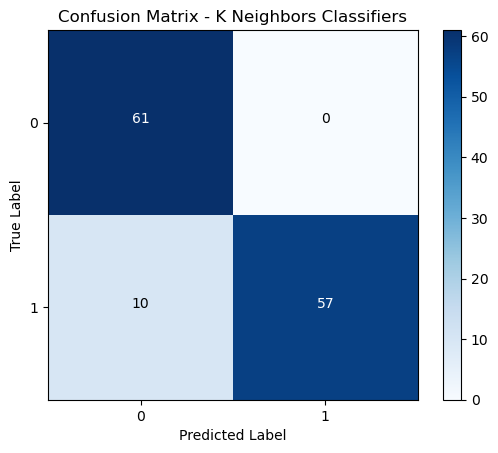

In [74]:
ov_knc_cm = confusion_matrix(y_test, y_pred_ov_knc.round())
print("Confusion Matrix - K Neighbors Classifiers")
print(ov_knc_cm)
print("\n")
plot_confusion_matrix(ov_knc_cm, classes=[0, 1], title= "Confusion Matrix - K Neighbors Classifiers")

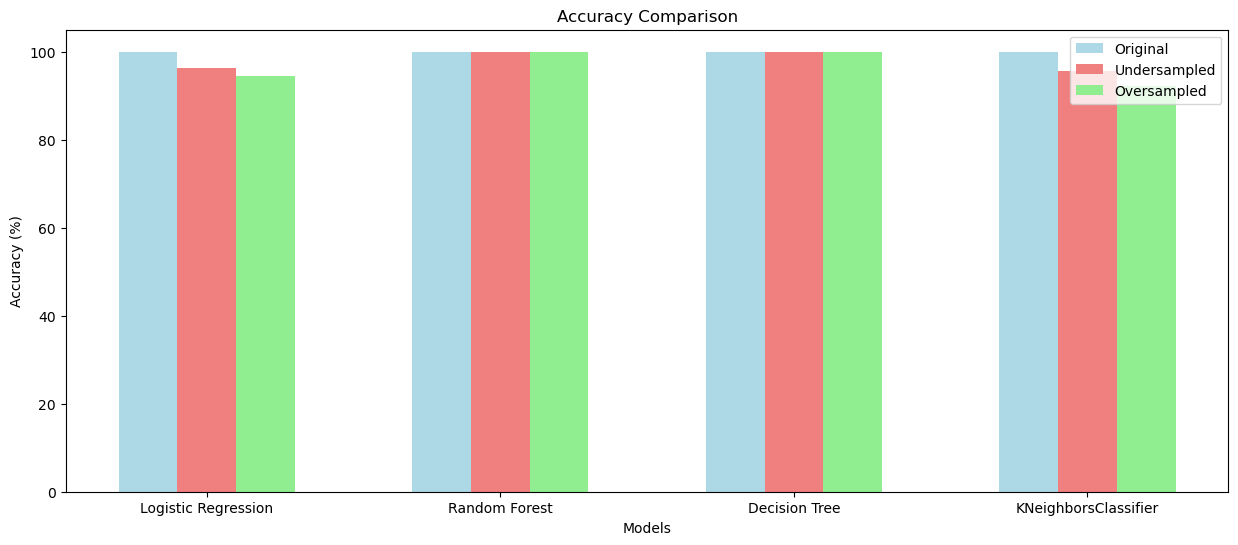

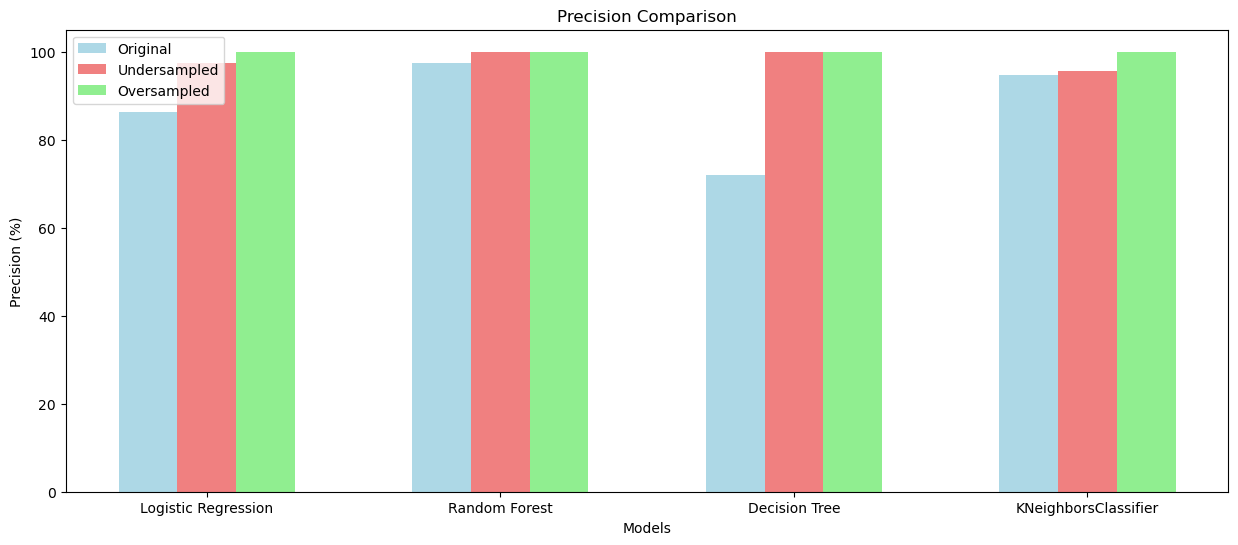

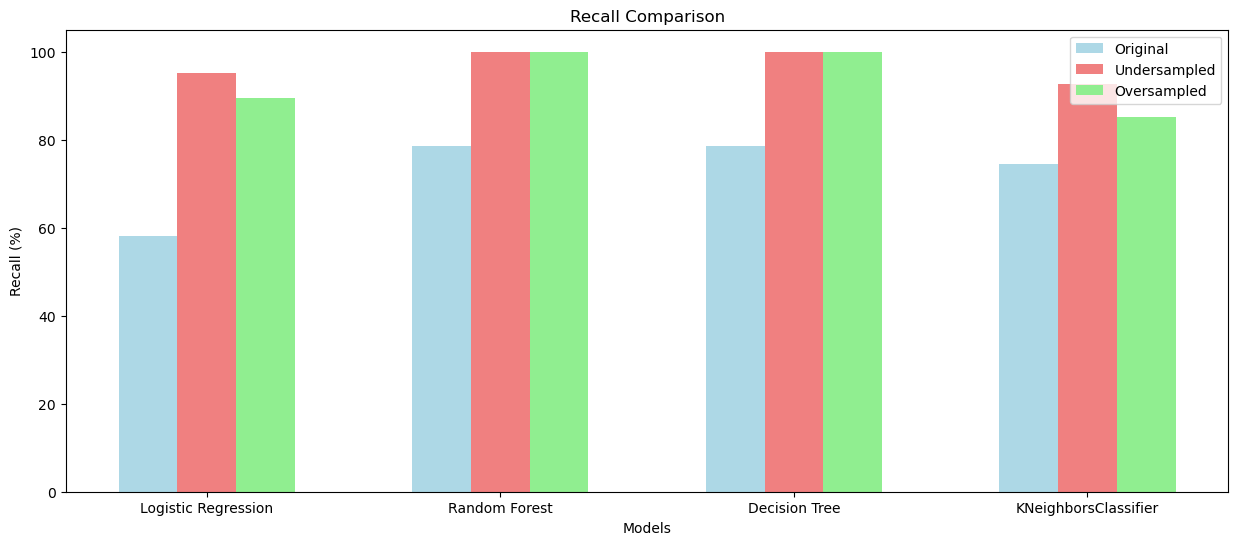

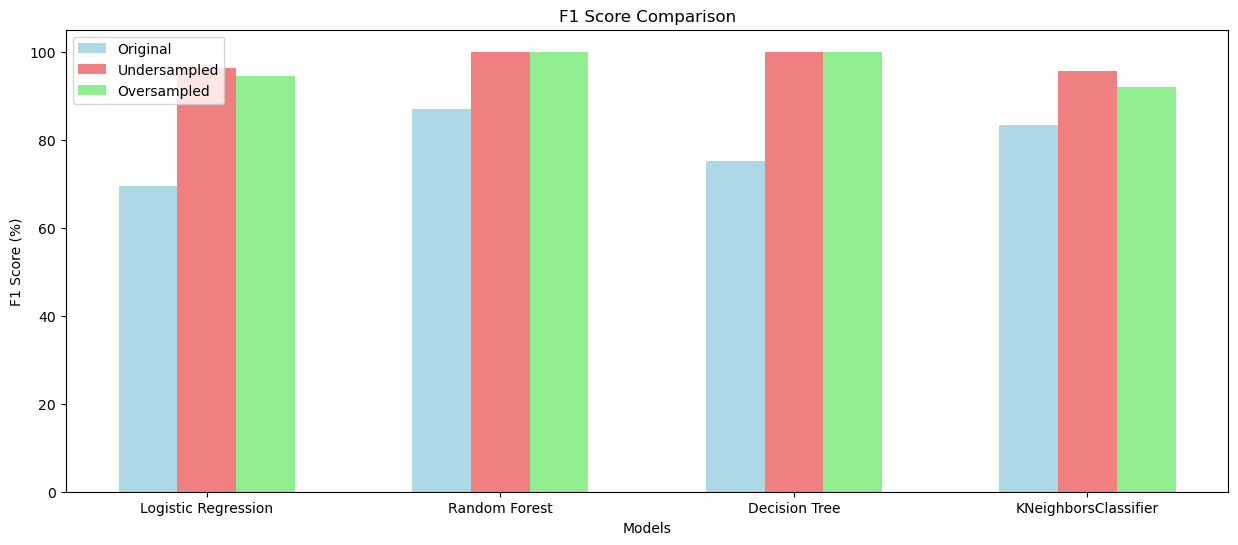

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Data for comparison
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'KNeighborsClassifier']

# Original dataset scores
acc_scores_original = [org_lr_acc_score, org_rfc_acc_score, org_dtc_acc_score, org_knc_acc_score]
pre_scores_original = [org_lr_pre_score, org_rfc_pre_score, org_dtc_pre_score, org_knc_pre_score]
rec_scores_original = [org_lr_rec_score, org_rfc_rec_score, org_dtc_rec_score, org_knc_rec_score]
f1_scores_original = [org_lr_f1_score, org_rfc_f1_score, org_dtc_f1_score, org_knc_f1_score]

# Undersampled dataset scores
acc_scores_undersampled = [un_lr_acc_score, un_rfc_acc_score, un_dtc_acc_score, un_knc_acc_score]
pre_scores_undersampled = [un_lr_pre_score, un_rfc_pre_score, un_dtc_pre_score, un_knc_acc_score]
rec_scores_undersampled = [un_lr_rec_score, un_rfc_rec_score, un_dtc_rec_score, un_knc_rec_score]
f1_scores_undersampled = [un_lr_f1_score, un_rfc_f1_score, un_dtc_f1_score, un_knc_f1_score]

# Oversampled dataset scores
acc_scores_oversampled = [ov_lr_acc_score, ov_rfc_acc_score, ov_dtc_acc_score, ov_knc_acc_score]
pre_scores_oversampled = [ov_lr_pre_score, ov_rfc_pre_score, ov_dtc_pre_score, ov_knc_pre_score]
rec_scores_oversampled = [ov_lr_rec_score, ov_rfc_rec_score, ov_dtc_rec_score, ov_knc_rec_score]
f1_scores_oversampled = [ov_lr_f1_score, ov_rfc_f1_score, ov_dtc_f1_score, ov_knc_f1_score]

# Plotting Accuracy Comparison
plt.figure(figsize=(15, 6))
bar_width = 0.2
index = np.arange(len(models))

plt.bar(index, acc_scores_original, width=bar_width, label='Original', color='lightblue')
plt.bar(index + bar_width, acc_scores_undersampled, width=bar_width, label='Undersampled', color='lightcoral')
plt.bar(index + 2 * bar_width, acc_scores_oversampled, width=bar_width, label='Oversampled', color='lightgreen')

plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison')
plt.xticks(index + bar_width, models)
plt.legend()
plt.show()

plt.figure(figsize=(15, 6))

plt.bar(index, pre_scores_original, width=bar_width, label='Original', color='lightblue')
plt.bar(index + bar_width, pre_scores_undersampled, width=bar_width, label='Undersampled', color='lightcoral')
plt.bar(index + 2 * bar_width, pre_scores_oversampled, width=bar_width, label='Oversampled', color='lightgreen')

plt.xlabel('Models')
plt.ylabel('Precision (%)')
plt.title('Precision Comparison')
plt.xticks(index + bar_width, models)
plt.legend()
plt.show()


plt.figure(figsize=(15, 6))

plt.bar(index, rec_scores_original, width=bar_width, label='Original', color='lightblue')
plt.bar(index + bar_width, rec_scores_undersampled, width=bar_width, label='Undersampled', color='lightcoral')
plt.bar(index + 2 * bar_width, rec_scores_oversampled, width=bar_width, label='Oversampled', color='lightgreen')

plt.xlabel('Models')
plt.ylabel('Recall (%)')
plt.title('Recall Comparison')
plt.xticks(index + bar_width, models)
plt.legend()
plt.show()

plt.figure(figsize=(15, 6))

plt.bar(index, f1_scores_original, width=bar_width, label='Original', color='lightblue')
plt.bar(index + bar_width, f1_scores_undersampled, width=bar_width, label='Undersampled', color='lightcoral')
plt.bar(index + 2 * bar_width, f1_scores_oversampled, width=bar_width, label='Oversampled', color='lightgreen')

plt.xlabel('Models')
plt.ylabel('F1 Score (%)')
plt.title('F1 Score Comparison')
plt.xticks(index + bar_width, models)
plt.legend()
plt.show()
